In [20]:
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import json
from io import StringIO
from dotenv import load_dotenv
import os
import csv

In [2]:
load_dotenv()

True

In [3]:
def testDeStatisAPI():
    test_req = {
        "username": os.getenv("API_USERNAME"),
        "password": os.getenv("API_PASSWORD"),
        "language": "de"
    }
    test_url = "https://www-genesis.destatis.de/genesisWS/rest/2020/helloworld/logincheck"
    test_response = requests.get(test_url, params=test_req)
    return test_response

In [4]:
testDeStatisAPI()

<Response [200]>

In [26]:
#######################################################################

In [7]:
request = {
    "username": os.getenv("API_USERNAME"),
    "password": os.getenv("API_PASSWORD"),
    "term": "Abfall",
    "category": "all",
    "pagelength": "20",
    "language": "de"
}

url = "https://www-genesis.destatis.de/genesisWS/rest/2020/find/find"

In [8]:
response = requests.get(url, params=request)

In [9]:
print(response.status_code)

200


In [10]:
print(response.json())

{'Ident': {'Service': 'find', 'Method': 'find'}, 'Status': {'Code': 0, 'Content': 'erfolgreich', 'Type': 'Information'}, 'Parameter': {'username': '********************', 'password': '********************', 'term': 'Abfall', 'category': 'Alle', 'pagelength': '20', 'language': 'de'}, 'Cubes': [{'Code': '32111BJ001', 'Content': 'Erhebung der Abfallentsorgung, Abfallentsorgungsanlagen, Input von Abfallentsorgungsanlagen, Im eigenen Betrieb erzeugte Abfälle, Aus dem Inland angelieferter Abfall, Aus dem Ausland angelieferter Abfall, Abfallentsorgungsanlagen mit Output, Output von Abfallentsorgungsanlagen, Abfälle zur Beseitigung, Abfälle zur Verwertung, Abfälle zu vorbereitenden Verfahren, Abgabe an Sonstige, Deutschland insgesamt, Anlagenart, Jahr', 'State': 'vollständig mit Werten', 'Time': '2006-2020', 'LatestUpdate': '05.07.2022 12:19:44h', 'Information': 'false'}, {'Code': '32111BJ002', 'Content': 'Erhebung der Abfallentsorgung, Abfallentsorgungsanlagen, Input von Abfallentsorgungsanla

In [5]:
#################################################################

In [3]:
def getTableWithInfo(id):
    print(id)
    req = {
        "username": os.getenv("API_USERNAME"),
        "password": os.getenv("API_PASSWORD"),
        "name": id,
        "area": "all",
        "compress ": "false",
        "transpose": "false",
        "job": "false",
        "stand": "01.01.1970 01:00",
        "language": "en"
    }
    url = "https://www-genesis.destatis.de/genesisWS/rest/2020/data/table"
    resp = requests.get(url, params=req)
    return resp


def getTableByID(id):
    print(id)
    req = {
        "username": os.getenv("API_USERNAME"),
        "password": os.getenv("API_PASSWORD"),
        "name": id,
        "area": "all",
        "compress ": "true",
        "format": "false",
        "language": "en"
    }
    url = "https://www-genesis.destatis.de/genesisWS/rest/2020/data/tablefile"
    resp = requests.get(url, params=req)
    return resp

In [4]:
tableID = "23311-0003"

In [120]:
def tableDFAndInfo(tableID):
    table_resp = getTableWithInfo(tableID)
    table_csv = StringIO(table_resp.json()["Object"]["Content"])
    title = resp.json()["Object"]["Structure"]["Head"]["Content"]
    resp_df = pd.read_csv(table_csv, delimiter=';', header=0, names=[title])
    return resp_df, table_resp

In [103]:
def justtableByID(tableID):
    table_resp = getTableByID(tableID)
    table_csv = StringIO(table_resp.text)
    resp_df = pd.read_csv(table_csv, delimiter=';')
    return resp_df

In [121]:
df, resp = tableDFAndInfo(tableID)

23311-0003


In [75]:
resp_df

GENESIS-Tabelle: 23311-0003
Terminations of pregnancy: Germany, quarters  NaN                               NaN
Statistics of abortions                       NaN                               NaN
Germany                                       NaN                               NaN
NaN                                           NaN         Terminations of pregnancy
                                              NaN                            number
...                                                                             ...
2022                                          Quarter 3                       26452
                                              Quarter 4                         ...
__________                                    NaN                               NaN
Â© Federal Statistical Office, Wiesbaden 2023 NaN                               NaN
created: 2023-01-26 / 14:32:51                NaN                               NaN

[116 rows x 1 columns]

In [76]:
resp_df

GENESIS-Tabelle: 23311-0003
Terminations of pregnancy: Germany, quarters  NaN                               NaN
Statistics of abortions                       NaN                               NaN
Germany                                       NaN                               NaN
NaN                                           NaN         Terminations of pregnancy
                                              NaN                            number
...                                                                             ...
2022                                          Quarter 3                       26452
                                              Quarter 4                         ...
__________                                    NaN                               NaN
Â© Federal Statistical Office, Wiesbaden 2023 NaN                               NaN
created: 2023-01-26 / 14:32:51                NaN                               NaN

[116 rows x 1 columns]

In [91]:
def keepOnlyNumbers(df):
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df[~pd.isna(df[df.columns[0]])]
    return df

In [93]:
df = keepOnlyNumbers(resp_df)

<AxesSubplot: >

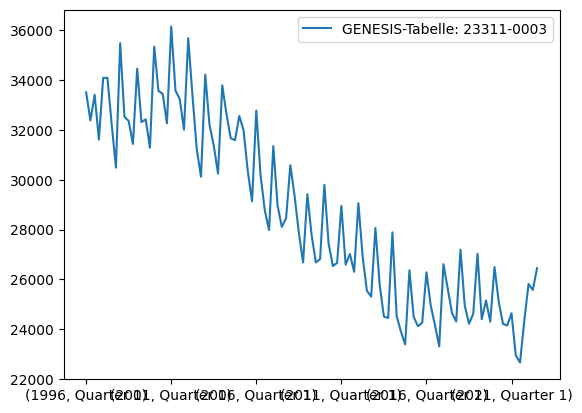

In [95]:
df.plot()